# Generating mock data by drawing from distributions

Last time we saw that a valuble way to plot distributions was to histogram them using matplotlib's `.hist` function.

Numpy also has a histogram function which can allow you to recover histograms of the data:

`np.histogram` : https://numpy.org/doc/stable/reference/generated/numpy.histogram.html 

Read through the above help page.


Let's start with exploring how this function could be hepful to us. 

Let's consider a uniform distribution and print the results of the `np.histogram` function

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
from scipy.stats import kurtosis
import scipy.stats as stats

In [2]:
dist0 = rnd.uniform(10, size=100)
print(np.histogram(dist0))

(array([ 9, 13,  7, 12, 11, 10,  7, 11, 12,  8]), array([1.03168815, 1.92457659, 2.81746502, 3.71035345, 4.60324189,
       5.49613032, 6.38901876, 7.28190719, 8.17479562, 9.06768406,
       9.96057249]))


This is how we can store the data in arrays and call them

In [3]:
number, bin_edges = np.histogram(dist0)

You'll notice I wrote 'bin_edges' not 'bin_centers' - you might want to verify these are bin_edges by printing the size of the two arrays. In the exercise below you will be asked to plot the bin_centers against the number. 

## Exercise:
Plot a histogram using `plt.bar` with the bin_centers plotted on the x-axis and the count in each bin on the y. 

In [4]:
# Answer here

## Exercise:

An object emits photons which we detect as a Guassian shaped emission line. The emission line has a wavelength of 20 cm, a standard deviation of 1cm and a flux (total integrated emission under the gaussian) of 100 (in arbitrary flux units). 
1. Use your knowledge of generating random data from a gaussian distribution to generate 1000 photons and 
2. Make a histogram of this data.
3. Overplot a Gaussian PDF of this data

In [5]:
# Answer


Now we will do this again but this time drawing data from the `stats.norm.pdf` ourselves using a technique called 'rejection sampling'.

We will do this in a few steps which we'll explore step-by-step before writing into a function:
1. define our model
2. draw a data point
3. choose whether to acept or reject this data point
4. loop back to the top and draw again

## Exercise:
1. Build a model gaussian pdf with a mean of 10 and a std of 3 and plot it

In [6]:
# Answer 


## Exercise:
2a. Use a function to draw a single random data point on the x axis from 0 to 20. Print it to verify it is between 0 and 20.

In [7]:
# Answer 


## Exercise:
2b. Use a function to draw a single random data point on the y axis. Use your plot above to decide what range to draw y from and print it to make sure it is within your chosen limits.

In [8]:
# Answer


## Exercise:
3. Write an if statement to choose whether to accept or reject your data point and print 'accept' or 'reject'. In this case you would like to keep values which are less than the model and reject those which are greater.  

In [9]:
# Answer


## Exercise:
4. Now take the steps above and put them in a loop - draw 1000 data points. Store the accepted values by appending them to a list.

In [10]:
# Answer


## Exercise:
Plot the model and the accepted x and y values. 

In [11]:
# Answer


## Exercise:
Now plot your accepted data points as a histogram. Think carefully about how to do this. There are many ways, one you have seen is very quick. 

In [12]:
# Answer


## Exercise
Can you think of a way to generate this data without using a loop (Hint: do you have to generate only one x and y at a time?)

In [13]:
# Answer 


Now we will see an example of how we could fit our data with a gaussian and verify that the mean and std are as we expected. We will come to things like this later on but it is good for you to see it now. 

Explore the help page for `scipy.optimize.curvefit`. to understand what this does.

model mean: 10.0
model sigma: 3.0
fit mean: 10.37282371567113
fit sigma: 2.931321978513289


(0.0, 20.0)

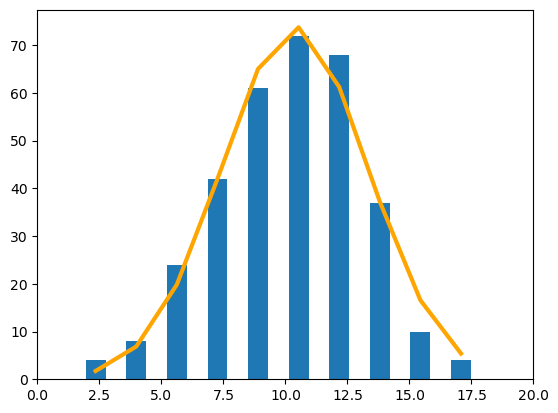

In [14]:
from scipy.optimize import curve_fit

# Here I am defining my model which will be a gaussian distribution
def Gauss(x,Amp,mean,sigma):
    return Amp*np.exp(-1.*(x-mean)**2/(2*sigma**2))

# Here we form our data from our model
model_mean=10.
model_sigma=3.
data_x = rnd.uniform(0,20,1000)
data_y = rnd.uniform(0,0.15,1000)
x=data_x[data_y<stats.norm.pdf(data_x,model_mean,model_sigma)]
print('model mean:', model_mean)
print('model sigma:', model_sigma)

# Here we make a histogram of the data - it is this binned 
# values we will fit our model against
number, bin_edges = np.histogram(x)
bin_centers = (bin_edges[0:-1]+bin_edges[1:])/2.

# Here we fit the data with curve_fit
parameters, covariance = curve_fit(Gauss, bin_centers, number)

# Here we report the paraameters - do you know why they are in this order?
amp = parameters[0]
mean = parameters[1]
sigma = parameters[2]
print('fit mean:', mean)
print('fit sigma:', sigma)

# Here we generate a model using our fit parameters and plot this and our data
# together so that we can check on the fit
fit_y = Gauss(bin_centers, amp, mean, sigma)
plt.bar(bin_centers, number, label='data')
plt.plot(bin_centers, fit_y, label='fit', color='orange', linewidth=3)
plt.xlim(0,20)